# Image processing

## 3rd Assignment - Shahid Beheshti University 

### Outline

- [Question 1](#0)
- [Question 2](#1)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import math
import glob
import random
from skimage.feature import hog
from skimage import data, exposure
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from scipy.spatial.distance import euclidean

<a name="0"></a>
## Question 1
Combine two faces


Text(0.5, 1.0, 'Low-pass filter to face2')

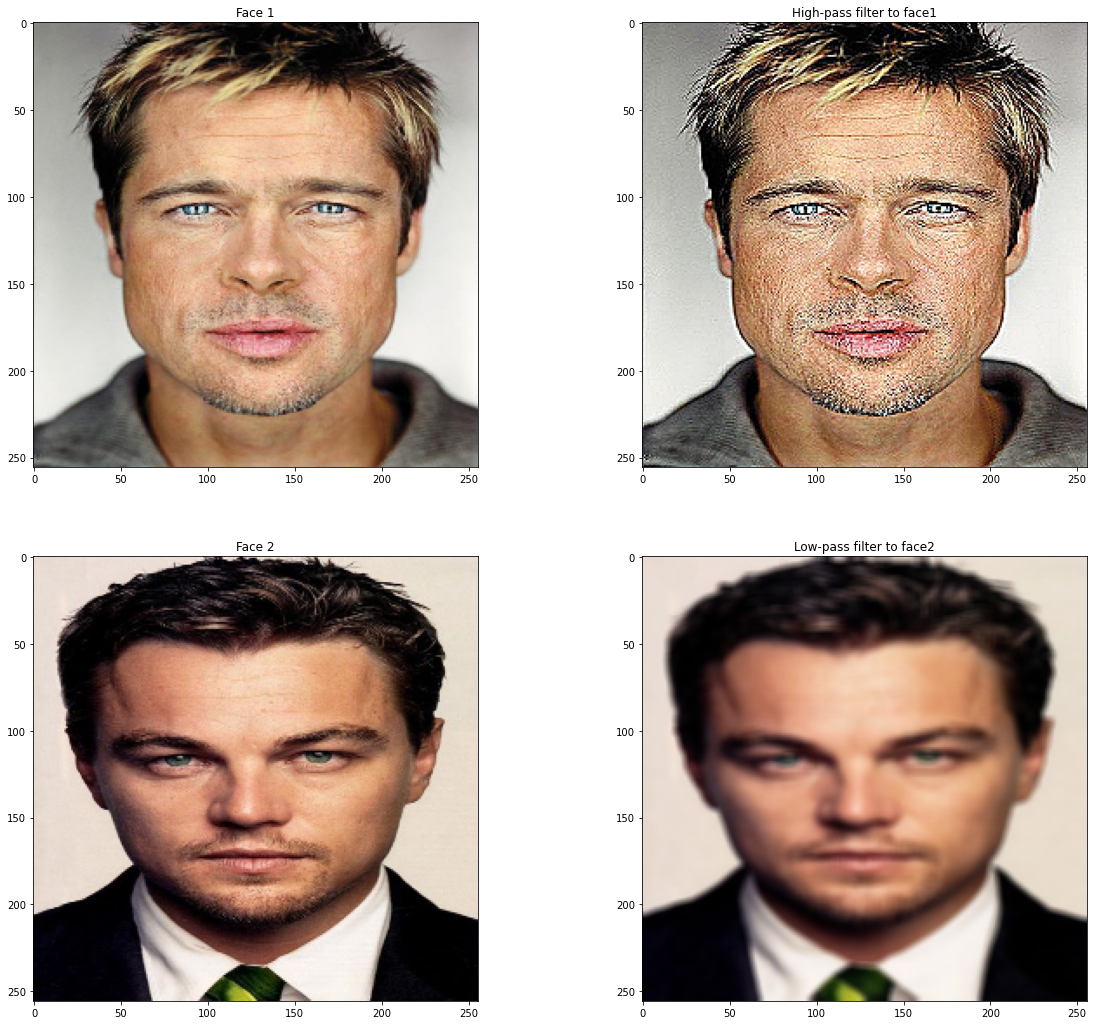

In [2]:
face1 = cv2.imread('dataset/image/1.jpg')
face2 = cv2.imread('dataset/image/2.jpg')

# Resize the images to the same dimensions
face1 = cv2.resize(face1, (256, 256))
face2 = cv2.resize(face2, (256, 256))

# Apply the high-pass filter to face1
kernel_hp = np.array([[0, -1, 0],
                      [-1, 5, -1],
                      [0, -1, 0]])
filtered_face1 = cv2.filter2D(face1, -1, kernel_hp)

# Apply the low-pass filter to face2
kernel_lp = np.ones((5, 5), np.float32) / 25
filtered_face2 = cv2.filter2D(face2, -1, kernel_lp)

# Combine the filtered faces
blended_face1 = cv2.addWeighted(filtered_face1, 0.5, filtered_face2, 0.5, 0)

# Display the resulting blended face
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax[0][0].imshow(cv2.cvtColor(face1, cv2.COLOR_BGR2RGB))
ax[0][0].set_title('Face 1')
ax[0][1].imshow(cv2.cvtColor(filtered_face1, cv2.COLOR_BGR2RGB))
ax[0][1].set_title('High-pass filter to face1')

ax[1][0].imshow(cv2.cvtColor(face2, cv2.COLOR_BGR2RGB))
ax[1][0].set_title('Face 2')
ax[1][1].imshow(cv2.cvtColor(filtered_face2, cv2.COLOR_BGR2RGB))
ax[1][1].set_title('Low-pass filter to face2')




#### A high-pass filter kernel is defined using the numpy library. This kernel enhances the edges and high-frequency components in an image.



#### A low-pass filter kernel is created using the numpy library. This kernel smoothes the image and reduces high-frequency noise.

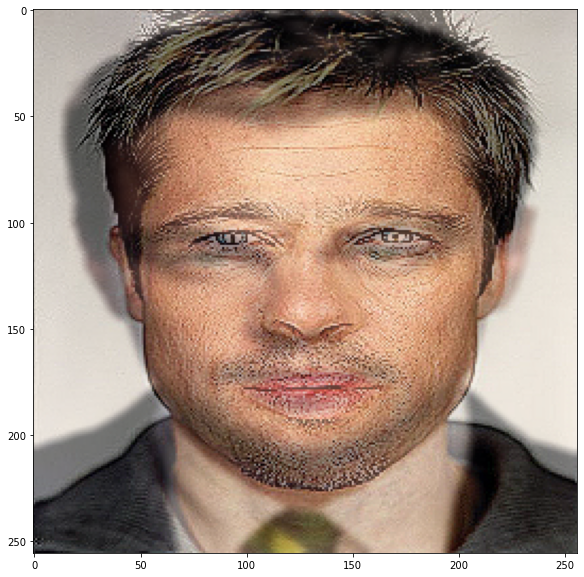

In [3]:
figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(blended_face1, cv2.COLOR_BGR2RGB))

**Swith Filters**

Text(0.5, 1.0, 'High-pass filter to face2')

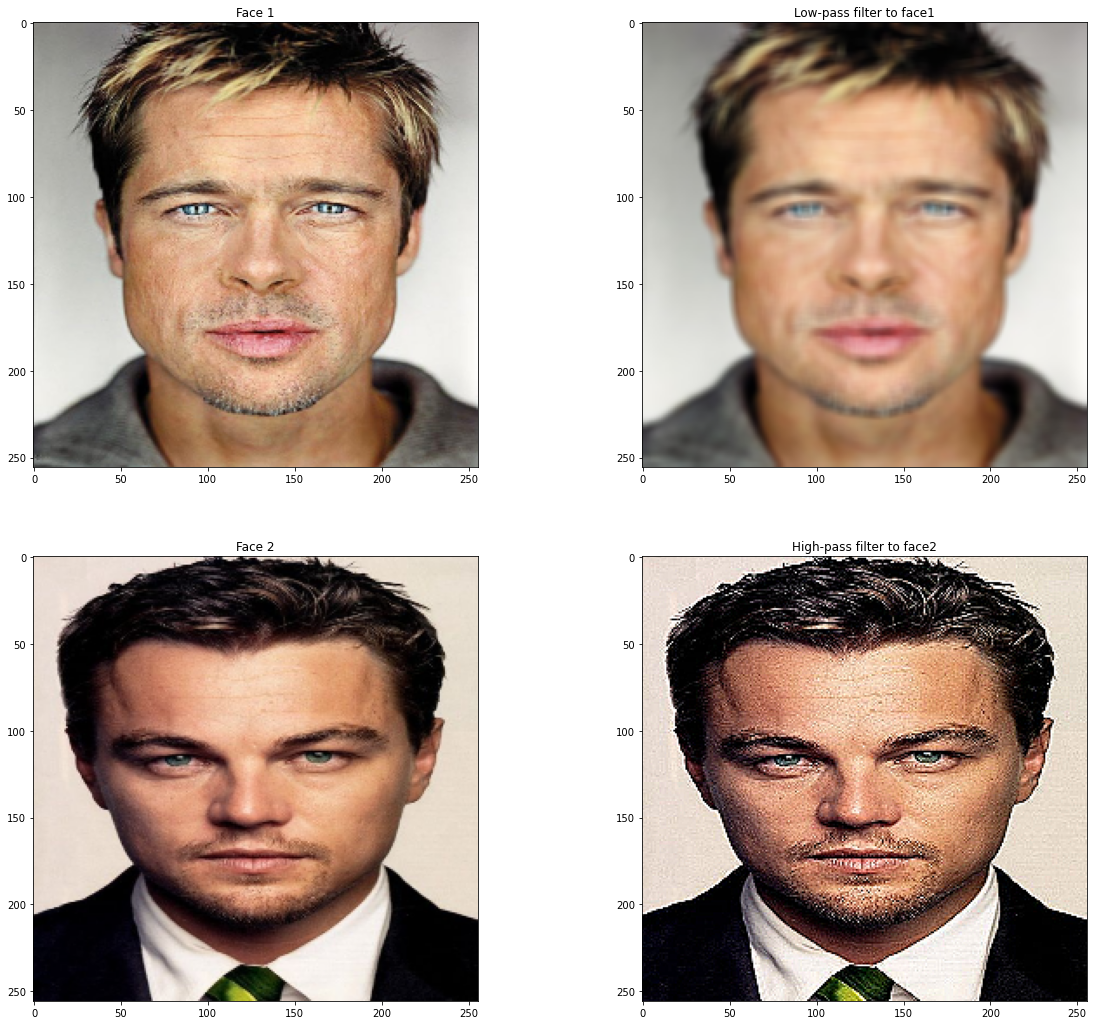

In [4]:
# Apply the high-pass filter to face2
kernel_hp = np.array([[0, -1, 0],
                      [-1, 5, -1],
                      [0, -1, 0]])
filtered_face2 = cv2.filter2D(face2, -1, kernel_hp)

# Apply the low-pass filter to face1
kernel_lp = np.ones((5, 5), np.float32) / 25
filtered_face1 = cv2.filter2D(face1, -1, kernel_lp)

# Combine the filtered faces
blended_face2 = cv2.addWeighted(filtered_face1, 0.5, filtered_face2, 0.5, 0)

# Display the resulting blended face
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax[0][0].imshow(cv2.cvtColor(face1, cv2.COLOR_BGR2RGB))
ax[0][0].set_title('Face 1')
ax[0][1].imshow(cv2.cvtColor(filtered_face1, cv2.COLOR_BGR2RGB))
ax[0][1].set_title('Low-pass filter to face1')

ax[1][0].imshow(cv2.cvtColor(face2, cv2.COLOR_BGR2RGB))
ax[1][0].set_title('Face 2')
ax[1][1].imshow(cv2.cvtColor(filtered_face2, cv2.COLOR_BGR2RGB))
ax[1][1].set_title('High-pass filter to face2')


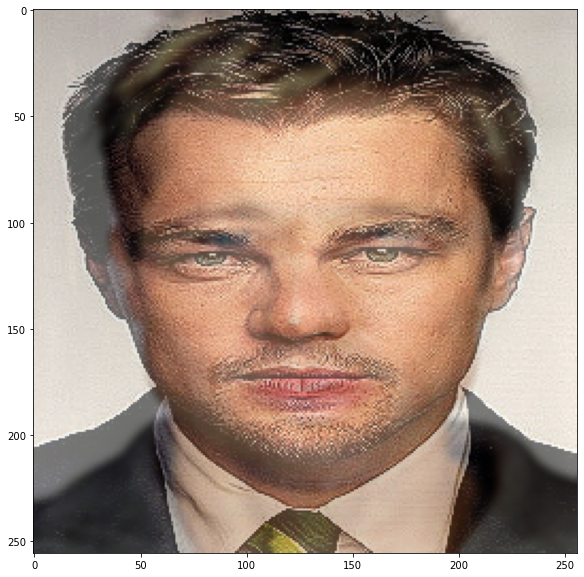

In [5]:
figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(blended_face2, cv2.COLOR_BGR2RGB))

# 

<a name="1"></a>
## Question 2
Fingerprint Classification

In [3]:
path = "dataset/NISTSpecialDatabase4GrayScaleImagesofFIGS/sd04/png_txt"
images = glob.glob(path + '/**/*.png', recursive=True)
texts = glob.glob(path + '/**/*.txt', recursive=True)

In [4]:
len(images)

4000

In [5]:
# Change images to grayScale and then Binary and save them
grayImages = []
binaryImages = []
for image in images:
    gray_image = cv2.imread(image, 0)
    grayImages.append(gray_image)
    _, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
    binaryImages.append(binary_image)

In [6]:
morphImages = []
for image in binaryImages:  
    kernel = np.ones((3, 3), np.uint8)
    morph_image = cv2.erode(image, kernel, iterations=1)
    morph_image = cv2.dilate(image, kernel, iterations=1)
    morphImages.append(morph_image)

In [7]:
edgeImages = []
for image in morphImages:  
    edges = cv2.Canny(image, 100, 200)
    edgeImages.append(edges)

#### Plot 5 random image from these

In [8]:
random_numbers = random.sample(range(4001), 5)

In [9]:
random_numbers

[2782, 3331, 3104, 2806, 3276]

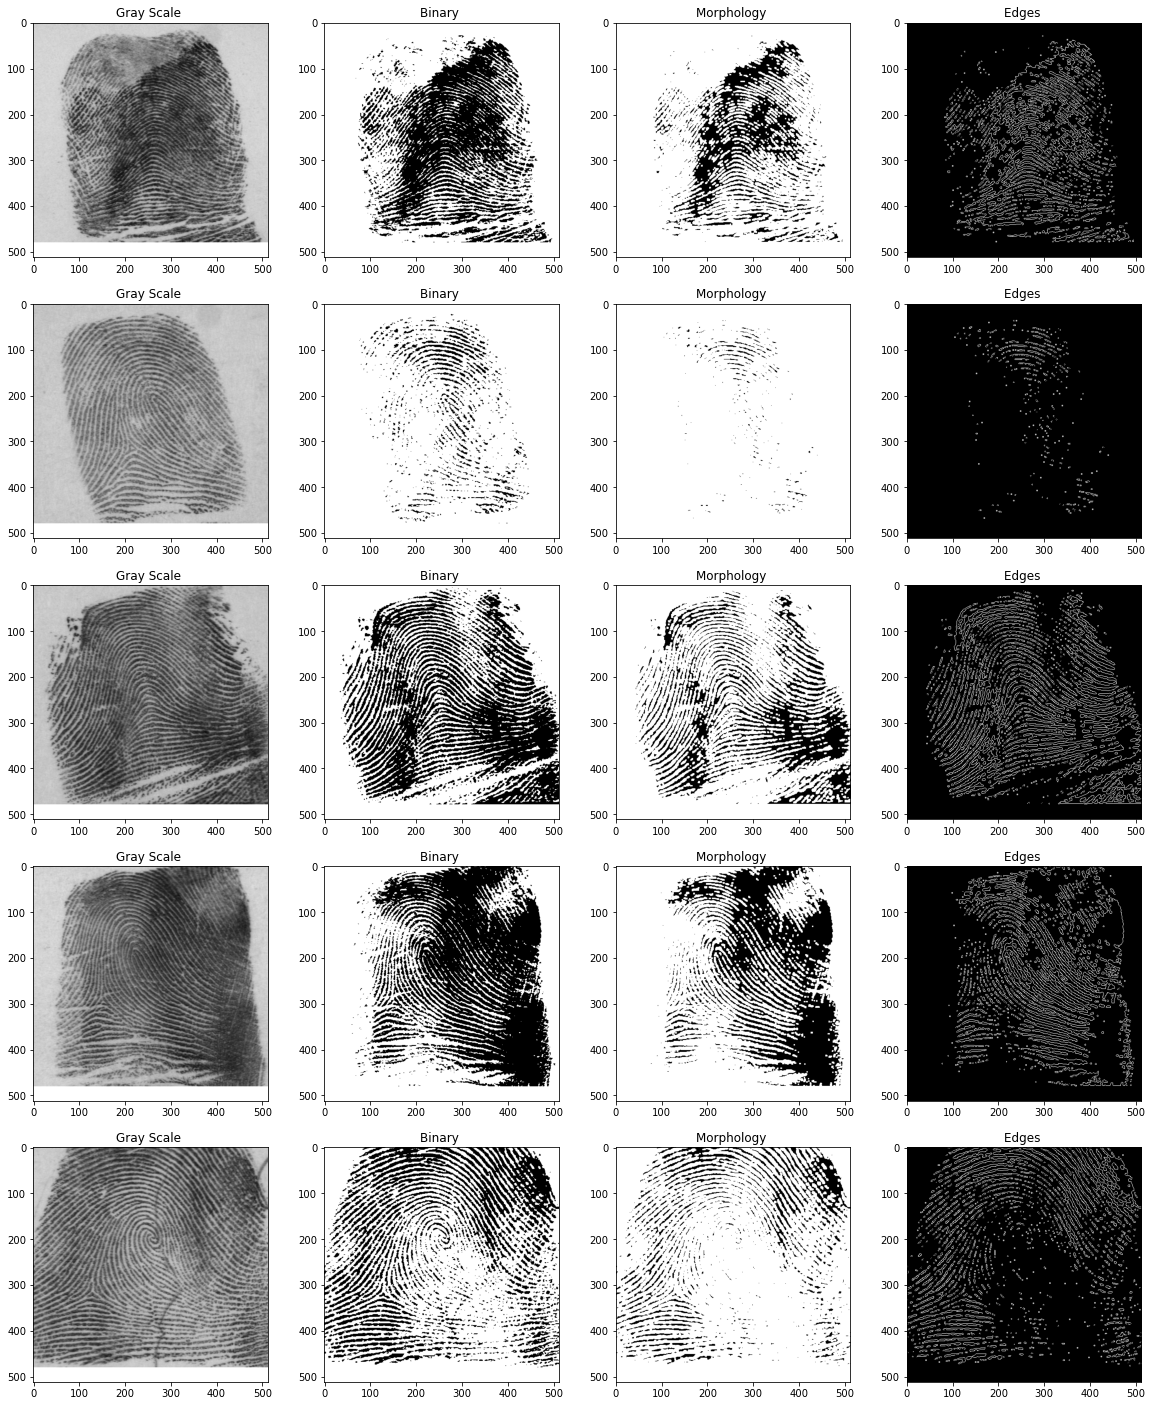

In [10]:
fig, ax = plt.subplots(5, 4, figsize=(20, 25))
for i in range(0,5):
    ax[i][0].imshow(cv2.cvtColor(grayImages[random_numbers[i]], cv2.COLOR_BGR2RGB))
    ax[i][0].set_title("Gray Scale ") 
    
    ax[i][1].imshow(cv2.cvtColor(binaryImages[random_numbers[i]], cv2.COLOR_BGR2RGB))
    ax[i][1].set_title("Binary ") 
    
    ax[i][2].imshow(cv2.cvtColor(morphImages[random_numbers[i]], cv2.COLOR_BGR2RGB))
    ax[i][2].set_title("Morphology ") 

    ax[i][3].imshow(cv2.cvtColor(edgeImages[random_numbers[i]], cv2.COLOR_BGR2RGB))
    ax[i][3].set_title("Edges ") 

In [11]:
#Add their class group to list
classfication = []
for txt in texts:
    with open(txt, 'r') as file:
        contents = file.read()
    classfication.append(contents[17])


In [12]:
len(classfication)

4000

In [14]:
setA = set(classfication)
setA

{'A', 'L', 'R', 'T', 'W'}

Five Groups: <br/> 
Arch (A)
Left Loop (L)
Right Loop (R)
Tented Arch (T)
Whirl (W)

In [17]:
imageA = []
imageL = []
imageR = []
imageT = []
imageW = []
for i in range(0,4000):
    if classfication[i] == 'A':
        imageA.append(i)
    elif classfication[i] == 'L':
        imageL.append(i)
    elif classfication[i] == 'R':
        imageR.append(i)
    elif classfication[i] == 'T':
        imageT.append(i)
    elif classfication[i] == 'W':
        imageW.append(i)

In [18]:
print ('W : ' + str(len(imageW)))
print ('T : ' + str(len(imageT)))
print ('A : ' + str(len(imageA)))
print ('L : ' + str(len(imageL)))
print ('R : ' + str(len(imageR)))

W : 800
T : 800
A : 800
L : 800
R : 800


#### First try to do classification with sum of edges in each class

In [19]:
num_edgesW = []
for w in imageW:
    num_edges = np.sum(edgeImages[w] > 0)
    num_edgesW.append(num_edges)
    
num_edgesT = []
for w in imageT:
    num_edges = np.sum(edgeImages[w] > 0)
    num_edgesT.append(num_edges)
    
num_edgesA = []
for w in imageA:
    num_edges = np.sum(edgeImages[w] > 0)
    num_edgesA.append(num_edges)
    
num_edgesL = []
for w in imageL:
    num_edges = np.sum(edgeImages[w] > 0)
    num_edgesL.append(num_edges)
    
num_edgesR = []
for w in imageR:
    num_edges = np.sum(edgeImages[w] > 0)
    num_edgesR.append(num_edges)

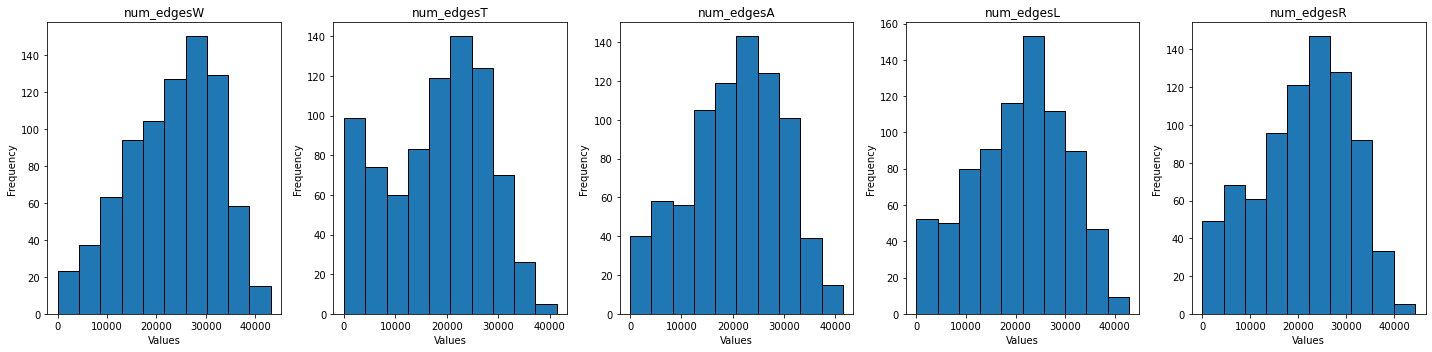

In [20]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

axs[0].hist(num_edgesW, bins=10, edgecolor='black')
axs[1].hist(num_edgesT, bins=10, edgecolor='black')
axs[2].hist(num_edgesA, bins=10, edgecolor='black')
axs[3].hist(num_edgesL, bins=10, edgecolor='black')
axs[4].hist(num_edgesR, bins=10, edgecolor='black')

# Adding labels and title to each subplot
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('num_edgesW')

axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('num_edgesT')

axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')
axs[2].set_title('num_edgesA')

axs[3].set_xlabel('Values')
axs[3].set_ylabel('Frequency')
axs[3].set_title('num_edgesL')

axs[4].set_xlabel('Values')
axs[4].set_ylabel('Frequency')
axs[4].set_title('num_edgesR')

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the histograms
plt.show()

#### but the above histogram shows that we can't do that 

# 

### Split data to test and train

In [21]:
All = imageT +  imageR +  imageA +  imageW +  imageL
len(All)

4000

In [22]:
test_size = 0.2  # Percentage of data to allocate for testing
random_state = 42  # Seed for reproducibility
train_data, test_data = train_test_split(All, test_size=test_size, random_state=random_state)

In [23]:
imageAtrain_data = []
imageLtrain_data = []
imageRtrain_data = []
imageTtrain_data = []
imageWtrain_data = []

for i in train_data:
    if classfication[i] == 'A':
        imageAtrain_data.append(i)
    elif classfication[i] == 'L':
        imageLtrain_data.append(i)
    elif classfication[i] == 'R':
        imageRtrain_data.append(i)
    elif classfication[i] == 'T':
        imageTtrain_data.append(i)
    elif classfication[i] == 'W':
        imageWtrain_data.append(i)

In [24]:
len(imageLtrain_data)

646

In [25]:
len(train_data)

3200

#### Using Hog features 
HOG (Histogram of Oriented Gradients) features are a popular method used for object detection and recognition in computer vision. They capture the local gradient information from an image and represent it as a feature vector.

In [26]:
hog_featuresW = []
for w in imageWtrain_data:
    features = hog(grayImages[w], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=False)
    hog_featuresW.append(features)
    
hog_featuresL = []
for w in imageLtrain_data:
    features = hog(grayImages[w], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=False)
    hog_featuresL.append(features)
    
hog_featuresR = []
for w in imageRtrain_data:
    features = hog(grayImages[w], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=False)
    hog_featuresR.append(features)
    
hog_featuresA = []
for w in imageAtrain_data:
    features = hog(grayImages[w], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=False)
    hog_featuresA.append(features)
    
hog_featuresT = []
for w in imageTtrain_data:
    features = hog(grayImages[w], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=False)
    hog_featuresT.append(features)


#### Classifier 
Overall, the Classifier function uses HOG feature extraction and similarity calculation(using euclidean) to classify the target image into one of the predefined groups based on the highest mean similarity

In [37]:
def Classifier(targetImage):
    new_image_hog_feature = hog(targetImage, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=False)

    
    # Calculate the similarity between the new image and each group
    similarities = []

    # Calculate similarity with 'W' group
    for hog_feature in hog_featuresW:
        distance = euclidean(new_image_hog_feature, hog_feature)
        similarity = 1 / (1 + distance)
        similarities.append(similarity)

    # Calculate similarity with 'L' group
    for hog_feature in hog_featuresL:
        distance = euclidean(new_image_hog_feature, hog_feature)
        similarity = 1 / (1 + distance)
        similarities.append(similarity)

    # Calculate similarity with 'R' group
    for hog_feature in hog_featuresR:
        distance = euclidean(new_image_hog_feature, hog_feature)
        similarity = 1 / (1 + distance)
        similarities.append(similarity)

    # Calculate similarity with 'A' group
    for hog_feature in hog_featuresA:
        distance = euclidean(new_image_hog_feature, hog_feature)
        similarity = 1 / (1 + distance)
        similarities.append(similarity)

    # Calculate similarity with 'T' group
    for hog_feature in hog_featuresT:
        distance = euclidean(new_image_hog_feature, hog_feature)
        similarity = 1 / (1 + distance)
        similarities.append(similarity)
    
    sim ={
        'W' :  np.mean(similarities[:658]),
        'L' :  np.mean(similarities[658:1304]),
        'R' :  np.mean(similarities[1304:1927]),
        'A' :  np.mean(similarities[1927:2571]),
        'T' :  np.mean(similarities[2571:]),


    }
    key_with_highest_value = max(sim, key=sim.get)
    return key_with_highest_value

# At first i did this to classify each image to one of the groups based on highest similarity 

#     predicted_group_index = similarities.index(max(similarities))
# #     print(predicted_group_index)
#     ans = ''
#     if predicted_group_index < 658:
# #         print("Predicted Group: Whirl (W)" )
#         ans ='W'
#     elif predicted_group_index < 1304:
# #         print("Predicted Group: Left Loop (L)")
#         ans ='L'
#     elif predicted_group_index < 1927:
# #         print("Predicted Group: Right Loop (R)")
#         ans ='R'
#     elif predicted_group_index < 2571:
# #         print("Predicted Group: Right Arch (A)")
#         ans ='A'
#     else:
# #         print("Predicted Group: Tented Arch (T)")
#         ans ='T'
#     return ans

In [41]:
count = 0
for i in range(0,100):
    if Classifier(grayImages[test_data[i]]) == classfication[test_data[i]]:
        count = count + 1

In [42]:
count

50

In [43]:
count = 0
for i in range(0,800):
    if Classifier(grayImages[test_data[i]]) == classfication[test_data[i]]:
        count = count + 1

In [44]:
count / 800 

0.55875

not bad!